In [ ]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

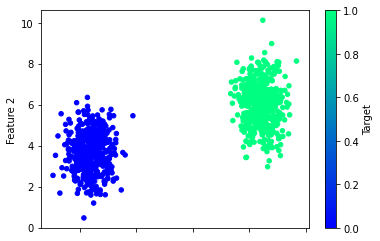

In [ ]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [ ]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [ ]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [ ]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [ ]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [ ]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 3         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9016 - accuracy: 0.3120
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8740 - accuracy: 0.3293
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8487 - accuracy: 0.3520
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8267 - accuracy: 0.3840
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8076 - accuracy: 0.4067
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7914 - accuracy: 0.4200
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7768 - accuracy: 0.4360
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7634 - accuracy: 0.4440
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7511 - accuracy: 0.4613
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7396 - accuracy: 0.4827
Epoch 11/

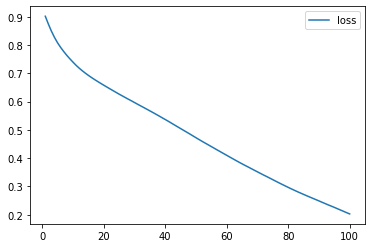

In [ ]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

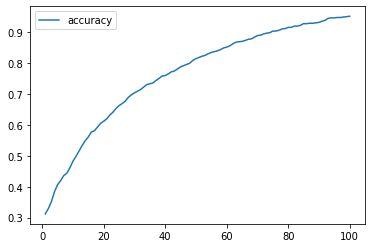

In [ ]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.1817 - accuracy: 0.9600
Loss: 0.18168024718761444, Accuracy: 0.9599999785423279


In [ ]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)